In [26]:
# PMI test
import math

print(math.log((1159/(50000952)) / (1938/50000952) / (1311/50000952)))

10.034908170336502


No handles with labels found to put in legend.


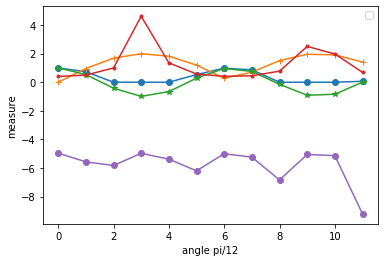

In [25]:
# various norms and distances graph
import math
import numpy as np
import matplotlib.pyplot as plt

def l1_norm(v):
    '''L1 distance'''
    norm = np.sum(v)
    return v / norm

def l2_norm(v):
    '''L2 distance'''
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

def froto(p, q):
    '''vector from p to q'''
    return np.array(p) - np.array(q)

def hellingm(p, q):
    '''returns Hellinger metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    hm = 0.
    for idx, elp in enumerate(p):
        hm += (math.sqrt(elp) - math.sqrt(max(q[idx], 0.)))**2
    return math.sqrt(hm) / math.sqrt(2.)

def euclid(p, q):
    '''Euclidean metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** 2
    return math.sqrt(ec) 

def minkovfr(p, q, pp):
    '''Minkowski and fractional metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** pp
    return ec ** (1. / pp)

def cosine(p, q):
    '''cosine similarity for distributions p and q'''
    if len(p) != len(q):
        return -1
    cs = 0.
    pn = 0.
    qn = 0.
    for idx, elp in enumerate(p):
        cs += elp * q[idx]
        pn += elp * elp
        qn += q[idx] * q[idx]
    if cs > 0. and pn > 0. and qn > 0.:
        return math.sqrt(cs) / math.sqrt(pn) / math.sqrt(qn)
    return 0

def jaccind(a, b):
    '''returns the Jaccard index for two sets a, b'''
    return len(a.intersection(b)) / len(a.union(b))

def kullei(p, q):
    '''Kullback-Leibler divergence (modified)'''
    return np.sum(np.dot(p, np.array([np.log(p / (q0 + 1) + 1) for q0 in q])))

def pmi(cwi, cwj, cco, ctot, eps=0.01):
    '''pointwise mutual information e.g. math.log((1159/(50000952)) / (1938/50000952) / (1311/50000952))'''
    return math.log((cco/ctot + eps ) / (cwi/ctot) / (cwj/ctot))

def npmi(cwi, cwj, cco, ctot, gamma=1.0, eps=0.01):
    '''normalized pointwise mutual information'''
    return (- pmi(cwi, cwj, cco, ctot, eps) / math.log((cco/ctot + eps ))) ** gamma

def pmi_vec(vi, vj, n, eps=0.01):
    '''pointwise mutual information vector version'''
    return math.log((np.abs(np.dot(vi,vj)) + eps ) / n / n)

def npmi_vec(vi, vj, n, gamma=1.0, eps=0.01):
    '''normalized pointwise mutual information vector version'''
    return (- pmi_vec(vi, vj, n, eps) / math.log(np.abs(np.dot(vi,vj)) + eps)) ** gamma

def main():
    vx = np.array([1., 0.])
    xc = range(12)
    yc = []
    yh = []
    ye = []
    yd = []
    ykl = []
    ypmi = []
    for phi in range(0,12): # go around in a circle
        vy = np.array([math.cos(phi), math.sin(phi)])
        yc.append(cosine(vx, vy))
        yh.append(hellingm(vx, vy))
        ye.append(euclid(vx, vy))
        yd.append(np.dot(vx, vy))
        ykl.append(kullei(vx, vy))
        ypmi.append(pmi_vec(vx, vy, 12))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set(xlabel='angle pi/12', ylabel='measure')
    plt.plot(xc, yc, marker='o') # Cosine
    #plt.plot(xc, yh, marker='x') # Helling
    plt.plot(xc, ye, marker='+') # Euclid
    plt.plot(xc, yd, marker='*') # dot
    plt.plot(xc, ykl, marker='.') # KL
    plt.plot(xc, ypmi, marker='o') # PMI
    ax.legend(loc='best')
    plt.show()
    
if __name__=='__main__':
    main()

In [4]:
# Auri examples
import random

def dist():
    dfact = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
    dnms = ['km', '100m', '10m', 'm', 'dm', 'cm', 'mm']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 4), dnms[i1])

def area():
    dfact = [1000000, 10000, 100, 1, 0.01, 0.0001, 0.000001]
    dnms = ['km2', 'ha', 'a', 'm2', 'dm2', 'cm2', 'mm2']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 6), dnms[i1])

def vol():
    dfact = [1000000000, 1000000, 1000, 1, 0.001, 0.000001, 0.000000001]
    dnms = ['km3', '1000000m3', '1000m3', 'm3', 'dm3', 'cm3', 'mm3']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 8), dnms[i1])

def cap():
    dfact = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
    dnms = ['kl', 'hl', 'dal', 'l', 'dl', 'cl', 'ml']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 8), dnms[i1])

def wgt():
    dfact = [1000, 1, 0.01, 0.001]
    dnms = ['t', 'kg', 'dag', 'g']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 8), dnms[i1])

def main():
    for i in range(10):
        print(dist())
    print()
    for i in range(10):
        print(area())
    print()
    for i in range(10):
        print(vol())
    print()
    for i in range(10):
        print(cap())
    print()
    for i in range(10):
        print(wgt())

if __name__=='__main__':
    main()

(26.33, '10m', 0.2633, 'km')
(26.0, 'm', 2.6, '10m')
(5.5, '10m', 55000.0, 'mm')
(7.71, 'dm', 0.0077, '100m')
(5.6, 'cm', 0.056, 'm')
(6.6, '100m', 6600.0, 'dm')
(5.75, 'km', 57500.0, 'dm')
(1.4, 'mm', 0.0, '100m')
(13.5, 'mm', 0.0, 'km')
(5.08, 'km', 5080000.0, 'mm')

(3.78, 'cm2', 0.0378, 'dm2')
(3.0, 'm2', 0.0003, 'ha')
(7.18, 'cm2', 7.18, 'cm2')
(3.71, 'km2', 3710000.0, 'm2')
(7.38, 'dm2', 73800.0, 'mm2')
(10.8, 'mm2', 0.0, 'a')
(7.0, 'ha', 700000000.0, 'cm2')
(1.2, 'a', 0.00012, 'km2')
(1.5, 'ha', 0.015, 'km2')
(3.88, 'm2', 0.0388, 'a')

(11.6, 'm3', 1e-08, 'km3')
(36.0, 'cm3', 0.0, 'km3')
(27.67, 'km3', 27670000000.0, 'm3')
(81.0, 'm3', 81.0, 'm3')
(16.0, 'm3', 15999999999.999998, 'mm3')
(63.0, '1000m3', 63.0, '1000m3')
(1.0, 'cm3', 0.0, '1000m3')
(14.5, 'm3', 14500000000.0, 'mm3')
(2.22, 'mm3', 0.0, 'km3')
(1.3, 'mm3', 0.0, 'm3')

(3.33, 'l', 333.0, 'cl')
(2.2, 'dal', 22.0, 'l')
(7.82, 'hl', 782000.0, 'ml')
(49.0, 'ml', 4.9e-05, 'kl')
(15.0, 'dal', 0.15, 'kl')
(9.22, 'ml', 9.22e

In [3]:
# test q,k,v-attention
import numpy as np

def softmax(x):
    """compute softmax values for each sets of scores in x"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def main():
    q = np.array([[0.1, 0.2, 0.2]])
    k = np.array([[0.1, 0, 0.3], [0.1, 0.2, 0], [0, 0.2, 0.3]])
    v = np.array([[1., 0., 1.]])
    print(k)
    print(np.dot(q, k.T))
    print(softmax(np.dot(q, k.T)) * v)

if __name__=='__main__':
    main()

[[0.1 0.  0.3]
 [0.1 0.2 0. ]
 [0.  0.2 0.3]]
[[0.07 0.05 0.1 ]]
[[1. 0. 1.]]


In [4]:
# text entropy 2
import math
import re
from collections import Counter

def entropy(s):
    '''calculate information entropy of given text'''
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1})
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())
        
def main():
    piece = input("Enter text: ").replace('\n', ' ').replace('\r', ' ')
    print('++++++++++++++++++++++++++++++++++++++')
    #print(uniqc(piece))
    print(entropy(piece))

if __name__=='__main__':
    main()

Enter text: the brown fox jumpes over the lazy dog
++++++++++++++++++++++++++++++++++++++
4.15183581727508


In [5]:
# Markov chain text generator
import sys
import random
 
def readdata(file):
    '''Read file and return contents.'''
    with open(file) as f:
        contents = f.read()
    return contents
 
def makerule(data, context):
    '''Make a rule dict for given data.'''
    rule = {}
    words = data.split(' ')
    index = context
 
    for word in words[index:]:
        key = ' '.join(words[index-context:index])
        if key in rule:
            rule[key].append(word)
        else:
            rule[key] = [word]
        index += 1
 
    return rule
 
def makestring(rule, length):    
    '''Use a given rule to make a string.'''
    oldwords = random.choice(list(rule.keys())).split(' ') #random starting words
    string = ' '.join(oldwords) + ' '
 
    for i in range(length):
        try:
            key = ' '.join(oldwords)
            newword = random.choice(rule[key])
            string += newword + ' '
 
            for word in range(len(oldwords)):
                oldwords[word] = oldwords[(word + 1) % len(oldwords)]
            oldwords[-1] = newword
 
        except KeyError:
            return string
    return string
 
if __name__ == '__main__':
    # Usage: markov.py source.txt context length
    #data = readdata(sys.argv[1])
    data = '''As soon as they heard her orders they ran away in every direction as fast as they could, Dorothy
only stopping once to pick a beautiful flower; and after a time the ladder was ready. The Scarecrow
climbed up the ladder first, but he was so anxious to get the new house and my wife as soon as
possible. The Lion hesitated no longer, but drank till the dish was empty. How do you do? I'm pretty
well, thank you, replied Dorothy politely. How do you do? I'm not feeling well, said the wolf, and
he dashed away at full speed, followed by the others. It was lucky the Scarecrow and the Tin
Woodman, for we certainly must climb over the wall. When they were on, Dorothy could not take them
off had she wished, but of course she did not wish to leave her little dog behind. Toto had run into
the crowd to bark at the birds sitting there. Dorothy went to the Witch's castle, where he was
placed in a small yard with a high arched room, the walls of which glistened with countless
emeralds. Before them stood a little man about the same height as herself; and when she had made out
the proper way of nursing it, (which was to twist it up into a sort of lullaby to it as she did not
notice when the Scarecrow stumbled into a hole and rolled over to the other side of the Tin Woodman,
sadly; for he is much too heavy to carry I shall have to think about that, replied the little old
woman as her only friend. No, I cannot do that, she replied, but I will give you some supper and a
place to pass the night with you, if you will only hold fast to the tip of my tail.'''
    #rule = makerule(data, int(sys.argv[2]))
    #string = makestring(rule, int(sys.argv[3]))
    rule = makerule(data, 10)
    string = makestring(rule, 50)
    print(string)

a small yard with a high arched room, the walls of which glistened with countless
emeralds. Before them stood a little man about the same height as herself; and when she had made out
the proper way of nursing it, (which was to twist it up into a sort of lullaby to it as she did not
notice when the Scarecrow stumbled into 


In [6]:
# search test time constraints on google
# googlesearch.search(query, tld='com', lang='en', tbs='0',
# safe='off', num=10, start=0, stop=None, domains=None, pause=2.0,
# tpe='', country='', extra_params=None, user_agent=None)[source]
# tbs (str) – Time limits (i.e “qdr:h” => last hour, “qdr:d” => last 24 hours, “qdr:m” => last month)
# A specific time range, for example from March 2 1984 to June 5 1987: tbs=cdr:1,cd_min:3/2/1984,cd_max:6/5/1987
# extra_params (dict) – A dictionary of extra HTTP GET parameters,
# which must be URL encoded. For example if you don’t want Google to filter similar
# results you can set the extra_params to {‘filter’: ‘0’} which will append ‘&filter=0’ to every query.

    # https://stenevang.wordpress.com/2013/02/22/google-advanced-power-search-url-request-parameters/
    '''Any time: tbs=qdr:a
    Last second: tbs=qdr:s (Read more about this “real time search” on Lifehacker)
    Last minute: tbs=qdr:n (Note! n like in nuts)
    Last 10 minutes: tbs=qdr:n10 (and so on for any number of minutes)
    Last hour: tbs=qdr:h
    Last 12 hours: tbs=qdr:h10 (and so on for any number of hours)
    Last day: tbs=qdr:d
    Last week: tbs=qdr:w
    Last month: tbs=qdr:m
    Last year: tbs=qdr:y
    A specific time range, for example from March 2 1984 to June 5 1987: tbs=cdr:1,cd_min:3/2/1984,cd_max:6/5/1987
    Sort by date: tbs=sbd:1
    Sort by relevance: tbs=sbd:0'''
    
try: 
    from googlesearch import search 
except ImportError:  
    print("No module named 'google' found") 
  
# to search 
query = "covid-19"
  
#for j in search(query, tld="co.in", num=5, stop=5, pause=1):
#for j in search(query, tld="co.in", tbs='cdr:2Ccd_min:2F30%2F2020:Ccd_max:2F11%2F2020', num=5, stop=5, pause=2):
for j in search(query, tld="co.in", tbs='cdr:1,cd_min:3/1/2020,cd_max:3/20/2020', num=5, stop=5, pause=2): 
    print(j)

https://www.sozialministerium.at/
https://www.ages.at/themen/krankheitserreger/coronavirus/
https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public
https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic
https://www.integrationsfonds.at/newsbeitrag/covid-19-mehrsprachige-informationen-zu-wichtigen-hygiene-und-verhaltensregeln-5339


In [9]:
from functools import reduce
import timeit

MULTIPLY = lambda x, y: x*y
 
class num(float):
    # the following method has complexity O(b)
    # rather than O(log b) via the rapid exponentiation
    def __pow__(self, b):
        return reduce(MULTIPLY, [self]*b, 1) # apply function passed in its argument to all of the list elements
    def __pow2__(self, b):
        return exp_by_squaring_iterative(self, b)
    
def exp_by_squaring_iterative(x, n):
    '''rapid exponentiation'''
    if n < 0:
        x = 1 / x
        n = -n
    if n == 0:
        return 1
    y = 1
    while n > 1:
        if n % 2 == 0: 
            x = x * x
            n = n / 2
        else:
            y = x * y
            x = x * x
            n = (n-1) / 2
    return x * y

def test():
    """Stupid test function"""
    L = []
    for i in range(100):
        L.append(i)

if __name__ == '__main__':
    # works with ints as function or operator
    print(num(2).__pow__(3))
    print(num(2) ** 3)
 
    # works with floats as function or operator
    print(num(2.3).__pow__(8))
    print(num(2.3) ** 8)

    print(exp_by_squaring_iterative(2.3, 8))
    print(2.3**8)
    
    #print(timeit.timeit("test()", setup="from __main__ import test"))
    print(timeit.timeit("num(2.3) ** 8", setup="from __main__ import num"))
    print(timeit.timeit("exp_by_squaring_iterative(2.3, 8)", setup="from __main__ import exp_by_squaring_iterative"))
    print(timeit.timeit("num(2.3).__pow2__(8)", setup="from __main__ import num"))
    print(timeit.timeit("2.3**8"))

8.0
8.0
783.1098528099996
783.1098528099996
783.1098528099994
783.1098528099996
1.099621199999092
0.6022185000001627
0.8770029000006616
0.009316300001955824


In [1]:
from functools import reduce

lst = [1, 2, 3, 4]
print(reduce(lambda x,y : x*y, lst))

24


In [15]:
# financial snippets

def pvn(c,r,g,n):
    '''present value with growth g'''
    return sum([c / (1+(r-g))**i for i in range(1,n)])

def pv(c,r,g):
    '''present value perpetuity with growth g'''
    return c / (r-g)

def fcf(ebit, txebit, depr, netcapex, dwcr):
    '''free cash flow'''
    noplat = ebit - txebit
    return (noplat, noplat + depr - netcapex - dwcr)

def capm(rf, betai, erm):
    '''E(ri) of CAPM'''
    return rf + betai * (erm - rf)

def main():
    print(pvn(100, 0.035, 0.015, 10))
    print(pv(100, 0.035, 0.015))
    print(fcf(100, 10, 15, 5, 3))

if __name__ == '__main__':
    main()

816.2236706367081
4999.999999999999
(90, 97)


In [20]:
import pandas as pd
import statsmodels.api as sm

'''
Download monthly prices of Facebook and S&P 500 index from 2014 to 2017
CSV file downloaded from Yahoo File
start period: 02/11/2014 
end period: 30/11/2014
period format: DD/MM/YEAR
'''
fb = pd.read_csv('FB.csv', parse_dates=True, index_col='Date',)
sp_500 = pd.read_csv('^GSPC.csv', parse_dates=True, index_col='Date')

# joining the closing prices of the two datasets 
monthly_prices = pd.concat([fb['Close'], sp_500['Close']], axis=1)
monthly_prices.columns = ['FB', '^GSPC']

# check the head of the dataframe
print(monthly_prices.head())

# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row
print(clean_monthly_returns.head())

FileNotFoundError: [Errno 2] File FB.csv does not exist: 'FB.csv'

In [1]:
# split dependent and independent variable
X = clean_monthly_returns['^GSPC']
y = clean_monthly_returns['FB']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

NameError: name 'clean_monthly_returns' is not defined

In [2]:
# alternatively scipy linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(slope)

NameError: name 'X' is not defined

In [39]:
# PMI tests
import math
from gensim import corpora

def word_count(str):
    counts = dict()
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

def pmi(cwi, cwj, cco, ctot, eps=0.01):
    '''pointwise mutual information e.g. math.log((1159/(50000952)) / (1938/50000952) / (1311/50000952))'''
    return math.log((cco/ctot + eps ) / (cwi/ctot) / (cwj/ctot))

def npmi(cwi, cwj, cco, ctot, gamma=1.0, eps=0.01):
    '''normalized pointwise mutual information'''
    return (- pmi(cwi, cwj, cco, ctot, eps) / math.log((cco/ctot + eps ))) ** gamma

def ctw(wi, wdict):
    '''count word wi in corpus'''
    return wdict.cfs[wdict.token2id[wi]]

def totw(wdict):
    '''total number of words'''
    return wdict.num_nnz # sum of the number of unique words per document over the entire corpus (non-0 BOW elements)

def ctcoww(wi, wj, text, nwdst=1): # assumes one contiguous text (need to condense docs first)
    '''co-occurance of words wi and wj up to distance nwdst (w/o w2v)'''
    txtl = text.split()
    widx = 0
    coct = [0 for i in range(nwdst+2)]
    while widx < len(txtl):
        try:
            widx = txtl.index(wi, widx) # find next occurance of first word wi
        except ValueError: # no more occurances of wi
            break
        try:
            wjdx = txtl.index(wj, max(widx - nwdst - 1, 0), min(widx + nwdst + 1, len(txtl))) # find wj not more than nwdst away
            distwiwj = abs(widx - wjdx)
            widx += 1
        except ValueError: # wj not found in immedate neighborhood
            widx += 1
            continue
        coct[distwiwj] += 1 # another co-occurance found
    return coct # returns all occurance frequencies up to given distance as list

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey test of user codist opinion of computer system test response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of codist user perceived test response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering codist test",
    "Graph minors A survey codist test",
]

stoplist = set('for a of the and to in'.split())

texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

dictionary = corpora.Dictionary(texts)
#dictionary.save('/tmp/deerwester.dict')  # store the dictionary, for future reference
print(dictionary)
print(dictionary.token2id)

corpus = [dictionary.doc2bow(text) for text in texts]
#corpora.MmCorpus.serialize('/tmp/deerwester.mm', corpus)  # store to disk, for later use
print(corpus) # (0, 1) = (id 0, appears once)

print( word_count('the quick brown fox jumps over the lazy dog.'))

print(ctw('minors', dictionary))
print(totw(dictionary))
print(ctcoww('codist', 'test', ' '.join(documents), 3))

print('pointwise mutual information')
print(pmi(ctw('codist', dictionary), ctw('test', dictionary), ctcoww('codist', 'test', ' '.join(documents))[1], totw(dictionary)))
print(pmi(ctw('graph', dictionary), ctw('minors', dictionary), ctcoww('graph', 'minors', ' '.join(documents))[1], totw(dictionary)))
print(pmi(ctw('human', dictionary), ctw('system', dictionary), ctcoww('human', 'system', ' '.join(documents))[1], totw(dictionary)))

print()

print('pointwise mutual information normalized')
print(npmi(ctw('codist', dictionary), ctw('test', dictionary), ctcoww('codist', 'test', ' '.join(documents))[1], totw(dictionary)))
print(npmi(ctw('graph', dictionary), ctw('minors', dictionary), ctcoww('graph', 'minors', ' '.join(documents))[1], totw(dictionary)))
print(npmi(ctw('human', dictionary), ctw('system', dictionary), ctcoww('human', 'system', ' '.join(documents))[1], totw(dictionary)))

wi = 'codist'
wj = 'test'
txtc = ' '.join(documents)
for ndst in range(1,10):
    print(ctcoww(wi, wj, txtc, ndst))

Dictionary(37 unique tokens: ['abc', 'applications', 'computer', 'human', 'interface']...)
{'abc': 0, 'applications': 1, 'computer': 2, 'human': 3, 'interface': 4, 'lab': 5, 'machine': 6, 'codist': 7, 'opinion': 8, 'response': 9, 'survey': 10, 'system': 11, 'test': 12, 'time': 13, 'user': 14, 'eps': 15, 'management': 16, 'engineering': 17, 'testing': 18, 'error': 19, 'measurement': 20, 'perceived': 21, 'relation': 22, 'binary': 23, 'generation': 24, 'random': 25, 'trees': 26, 'unordered': 27, 'graph': 28, 'intersection': 29, 'paths': 30, 'iv': 31, 'minors': 32, 'ordering': 33, 'quasi': 34, 'well': 35, 'widths': 36}
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(2, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1)], [(4, 1), (11, 1), (14, 1), (15, 1), (16, 1)], [(3, 1), (11, 2), (15, 1), (17, 1), (18, 1)], [(7, 1), (9, 1), (12, 1), (13, 1), (14, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(26, 1), (28, 1), 

In [1]:
# fraction reduction

def redok(nu, den):
    '''checks if digit cross out reduce corresponds to correct reduction'''
    nul = [int(d) for d in str(nu)]
    denl = [int(d) for d in str(den)]
    for ndg in nul:
        for ddg in denl:
            if ndg == ddg: # TODO: multimatches
                nutst = int('0' + ''.join([str(d) for d in nul if d != ndg]))
                dentst = int('0' + ''.join([str(d) for d in denl if d != ddg]))
                if dentst > 0 and nutst != dentst: # exclude div0 and trivial cases
                    if nu / den == nutst / dentst:
                        return True
    return False

def crosscand(n):
    '''identify cross-out candidates'''
    ll = 10 ** (n-1)
    ul = ll * 10
    for nu in range(ll, ul):
        for den in range(nu, ul):
            if redok(nu, den):
                print(nu, den)
    return 0

def main():
    #print(redok(16,64))
    crosscand(2)

if __name__ == '__main__':
    main()

10 20
10 30
10 40
10 50
10 60
10 70
10 80
10 90
16 64
19 95
20 30
20 40
20 50
20 60
20 70
20 80
20 90
26 65
30 40
30 50
30 60
30 70
30 80
30 90
40 50
40 60
40 70
40 80
40 90
49 98
50 60
50 70
50 80
50 90
60 70
60 80
60 90
70 80
70 90
80 90


In [1]:
def square(n):
    return n * n
 
numbers = [1, 3, 5, 7]
 
squares1 = [square(n) for n in numbers]     # list comprehension
print(squares1)
squares2a = map(square, numbers)            # functional form
print(list(squares2a))
squares2b = map(lambda x: x*x, numbers)     # functional form with `lambda`
print(list(squares2b))
squares3 = [n * n for n in numbers]         # no need for a function,
                                            # anonymous or otherwise
print(squares3)
isquares1 = (n * n for n in numbers)        # iterator, lazy
print(list(isquares1))
isquares2 = map(square, numbers) # iterator, lazy (evaluated when needed)
print(list(isquares2))

[1, 9, 25, 49]
[1, 9, 25, 49]
[1, 9, 25, 49]
[1, 9, 25, 49]
[1, 9, 25, 49]
[1, 9, 25, 49]


In [5]:
# pandas load test 
import pandas as pd
import os

os.chdir('D:\BernieData\DeepL\lrgtxt0')
# Read data from file 'filename.csv' 
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("AAPL.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,date,open,high,low,close,volume
0,12/12/1980,0.5134,0.5155,0.5134,0.5134,117258400
1,15/12/1980,0.4889,0.4889,0.4866,0.4866,43971200
2,16/12/1980,0.4530,0.4530,0.4509,0.4509,26432000
3,17/12/1980,0.4620,0.4643,0.4620,0.4620,21610400
4,18/12/1980,0.4755,0.4777,0.4755,0.4755,18362400


In [12]:
s = pd.Series(data['close'])

#for l in range(-15,15):
    #print(l, s.autocorr(lag=l))
s.autocorr()

0.9997316771418726

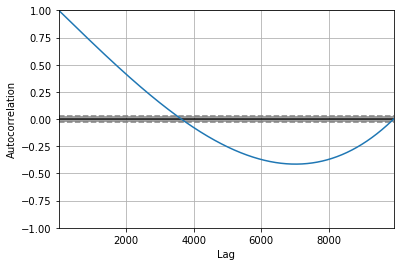

In [13]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

os.chdir('D:\BernieData\DeepL\lrgtxt0')
#dr = pd.date_range(start='1984-01-01', end='1984-12-31')
dr = pd.read_csv("AAPL.csv") 

df = pd.DataFrame(np.arange(len(dr)), index=dr, columns=["close"])
autocorrelation_plot(df)
plt.show()

In [40]:
# PMI tests long text
import math
import os
from gensim import corpora
from gensim.parsing.preprocessing import preprocess_string

def read_in_chunks(infile, chunk_size=1024*64):
    chunk = infile.read(chunk_size)
    while chunk:
        yield chunk
        chunk = infile.read(chunk_size)

def process_data(chunk, text):
    text.append(str(chunk)) # 'utf8' codec can't decode byte 0xc3

def word_count(str):
    counts = dict()
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

def pmi(cwi, cwj, cco, ctot, eps=0.01):
    '''pointwise mutual information e.g. math.log((1159/(50000952)) / (1938/50000952) / (1311/50000952))'''
    return math.log((cco/ctot + eps ) / (cwi/ctot) / (cwj/ctot))

def npmi(cwi, cwj, cco, ctot, gamma=1.0, eps=0.01):
    '''normalized pointwise mutual information'''
    return (- pmi(cwi, cwj, cco, ctot, eps) / math.log((cco/ctot + eps ))) ** gamma

def ctw(wi, wdict):
    '''count word wi in corpus'''
    return wdict.cfs[wdict.token2id[wi]] # Collection frequencies: token_id -> how many instances of this token are contained in the documents

def totwd(wdict):
    '''total number of words'''
    return wdict.num_nnz # sum of the number of unique words per document over the entire corpus (non-0 BOW elements)

def totwc(crps):
    '''total number of words in corpus (as list)'''
    return len(crps)

def ctcoww(wi, wj, text, nwdst=1): # assumes one contiguous text (need to condense docs first)
    '''co-occurance of words wi and wj up to distance nwdst (w/o w2v)'''
    txtl = text.split()
    widx = 0
    coct = [0 for i in range(nwdst+2)]
    while widx < len(txtl):
        try:
            widx = txtl.index(wi, widx) # find next occurance of first word wi
        except ValueError: # no more occurances of wi
            break
        try:
            wjdx = txtl.index(wj, max(widx - nwdst - 1, 0), min(widx + nwdst + 1, len(txtl))) # find wj not more than nwdst away
            distwiwj = abs(widx - wjdx)
            widx += 1
        except ValueError: # wj not found in immedate neighborhood
            widx += 1
            continue
        coct[distwiwj] += 1 # another co-occurance found
    return coct # returns all occurance frequencies up to given distance as list

os.chdir(r'D:\BernieData\DeepL\lrgtxt0')
documents = []
f = open('Proktols of Neptune.txt', encoding="utf-8")
for piece in read_in_chunks(f): # read file
    process_data(piece, documents)

corpus = preprocess_string(' '.join(documents)) # corpus holds the source text as list, preprocessed

texts = [
    [word for word in document.lower().split()]
    for document in corpus
]

dictionary = corpora.Dictionary(texts)
#dictionary.save('/tmp/deerwester.dict')  # store the dictionary, for future reference
#print(dictionary)
#print(dictionary.token2id)

#corpus = [dictionary.doc2bow(text) for text in texts]
#corpora.MmCorpus.serialize('/tmp/deerwester.mm', corpus)  # store to disk, for later use
#print(corpus) # (0, 1) = (id 0, appears once)

#print(' '.join(corpus))

ntot = totwd(dictionary)
wi = 'rocket' # 15 times
wj = 'roar' # just once

print(pmi(ctw(wi, dictionary), ctw(wj, dictionary), ctcoww(wi, wj, ' '.join(corpus))[1], ntot))
print(npmi(ctw(wi, dictionary), ctw(wj, dictionary), ctcoww(wi, wj, ' '.join(corpus))[1], ntot))

'''wi = 'minut' # 7
wj = 'ago' # 5 just once minutes ago
print(npmi(ctw(wi, dictionary), ctw(wj, dictionary), ctcoww(wi, wj, ' '.join(corpus))[1], ntot))
wi = 'year' # 2
wj = 'ago' # 2 together
print(npmi(ctw(wi, dictionary), ctw(wj, dictionary), ctcoww(wi, wj, ' '.join(corpus))[1], ntot))
wi = 'patrol' # 8, 6 together
wj = 'ship'
print(npmi(ctw(wi, dictionary), ctw(wj, dictionary), ctcoww(wi, wj, ' '.join(corpus))[1], ntot))
wi = 'food' # once only
wj = 'tast'
print(npmi(ctw(wi, dictionary), ctw(wj, dictionary), ctcoww(wi, wj, ' '.join(corpus))[1], ntot))
wi = 'blood' # 4, never together
wj = 'score'
print(npmi(ctw(wi, dictionary), ctw(wj, dictionary), ctcoww(wi, wj, ' '.join(corpus))[1], ntot))
wi = 'blood' # 4, once together
wj = 'ooz'
print(npmi(ctw(wi, dictionary), ctw(wj, dictionary), ctcoww(wi, wj, ' '.join(corpus))[1], ntot))'''

wi = 'patrol' # 8, 6 together
wj = 'ship'
txtc = ' '.join(corpus)
for ndst in range(1,20):
    print(ctcoww(wi, wj, txtc, ndst))


9.752028181220343
2.126720665659349
[0, 5, 0]
[0, 5, 0, 0]
[0, 5, 0, 0, 0]
[0, 5, 0, 0, 0, 0]
[0, 5, 0, 0, 0, 0, 0]
[0, 5, 0, 0, 0, 0, 0, 0]
[0, 4, 0, 0, 0, 0, 0, 0, 1]
[0, 4, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [1]:
# equilibrium index

def eqindexMultiPass(s):
    return [i for i in range(len(s)) if sum(s[:i]) == sum(s[i+1:])]
    
def main():
    print(eqindexMultiPass([-7,1,5,2,-4,3,0]))

if __name__ == '__main__':
    main()

[3, 6]


In [10]:
# Ethiopian multiplication

def ethmlt(a,b):
    '''Ethiopian multiplication'''
    al = [a]
    ac = a
    while ac > 1:
        ac = ac // 2
        al.append(ac)
    bl = []
    bc = b
    for a in al:
        bl.append(bc)
        bc *= 2
    for i in range(len(al)):
        if al[i] % 2 == 0:
            bl[i] = 0 # remove from list same as setting to 0
    return sum(bl)

def main():
    print(ethmlt(17,34))

if __name__ == '__main__':
    main()

578


In [12]:
data = [
    '1.3.6.1.4.1.11.2.17.19.3.4.0.10',
    '1.3.6.1.4.1.11.2.17.5.2.0.79',
    '1.3.6.1.4.1.11.2.17.19.3.4.0.4',
    '1.3.6.1.4.1.11150.3.4.0.1',
    '1.3.6.1.4.1.11.2.17.19.3.4.0.1',
    '1.3.6.1.4.1.11150.3.4.0'
]
 
for s in sorted(data, key=lambda x: list(map(int, x.split('.')))):
    print(s)

1.3.6.1.4.1.11.2.17.5.2.0.79
1.3.6.1.4.1.11.2.17.19.3.4.0.1
1.3.6.1.4.1.11.2.17.19.3.4.0.4
1.3.6.1.4.1.11.2.17.19.3.4.0.10
1.3.6.1.4.1.11150.3.4.0
1.3.6.1.4.1.11150.3.4.0.1


In [14]:
# shell sort
def shell(seq):
    '''shell sort'''
    inc = len(seq) // 2
    while inc:
        for i, el in enumerate(seq[inc:], inc):
            while i >= inc and seq[i - inc] > el:
                seq[i] = seq[i - inc]
                i -= inc
            seq[i] = el
        inc = 1 if inc == 2 else inc * 5 // 11
        
def main():
    lst = [0, 5, 0, 12, 5, 8, 0, 2]
    shell(lst)
    print(lst)

if __name__ == '__main__':
    main()     

[0, 0, 0, 2, 5, 5, 8, 12]


In [7]:
# orange circles
import math

def arean(n):
    '''area of nth doughnut'''
    return 3. * math.pi / 4. / 16 ** n

def main():
    #print(arean(5))
    sa = 0.
    for i in range(200):
        sa += arean(i)
    print(sa / math.pi)

if __name__ == '__main__':
    main()

0.7999999999999998


In [11]:
# Call an object method

class MyClass(object):
	@classmethod
	def myClassMethod(self, x):
		pass
	@staticmethod
	def myStaticMethod(x):
		pass
	def myMethod(self, x):
		return 42 + x
 
myInstance = MyClass()
 
# Instance method
myInstance.myMethod(2)
# A method can also be retrieved as an attribute from the class, and then explicitly called on an instance:
MyClass.myMethod(myInstance, 3)
 
 
# Class or static methods
MyClass.myClassMethod(2)
MyClass.myStaticMethod(2)
# You can also call class or static methods on an instance, which will simply call it on the instance's class
myInstance.myClassMethod(3)
myInstance.myStaticMethod(3)

209 791


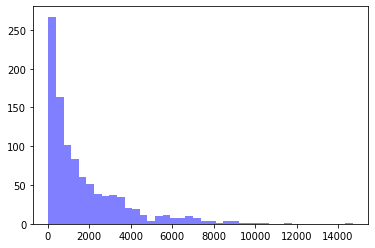

In [1]:
# gamblers ruin example
import random
import matplotlib.pyplot as plt

# fair coin
def flpcn():
    '''flip a fair coin'''
    return random.randint(0,1)

# limited and unlimited budget
def limbgg(l0,l1,betsz=1):
    '''limited budget game'''
    t = 0
    while l0 > 0 and l1 > 0:
        t += 1
        if flpcn() == 0:
            l0 += betsz
            l1 -= betsz
        else:
            l0 -= betsz
            l1 += betsz
    if l0 > 0:
        return (0, l0, t)
    return (1, l1, t)

def main():
    #print(limbgg(10, 20))
    xc = []
    #y0 = []
    #y1 = []
    c0, c1 = 0, 0
    for i in range(1000):
        res = limbgg(20, 80)
        xc.append(res[2])
        if res[0] == 0:
            c0 += 1
            #y0.append(res[1])
            #y1.append(0)
        else:
            c1 += 1
            #y0.append(0)
            #y1.append(res[1])
    print(c0, c1)
    #plt.scatter(xc, y0)
    #plt.scatter(xc, y1)
    num_bins = 40
    n, bins, patches = plt.hist(xc, num_bins, facecolor='blue', alpha=0.5)
    plt.show()

if __name__ == '__main__':
    main()

In [4]:
# e
def vale(n):
    '''value of e'''
    res = 2
    if n <= 1:
        return res
    cv = 2
    for i in range(3,n+1):
        res += 1 / cv
        cv *= i
    return res

def main():
    etru = 2.71828182845904523536028747135266249775724709369995
    print(vale(12))

if __name__ == '__main__':
    main()

2.718281826198493


In [1]:
_suffix = ['th', 'st', 'nd', 'rd', 'th', 'th', 'th', 'th', 'th', 'th']
 
def nth(n):
    return "%i'%s" % (n, _suffix[n%10] if n % 100 <= 10 or n % 100 > 20 else 'th')
 
if __name__ == '__main__':
    for j in range(0,1001, 250):
        print(' '.join(nth(i) for i in list(range(j, j+25))))

0'th 1'st 2'nd 3'rd 4'th 5'th 6'th 7'th 8'th 9'th 10'th 11'th 12'th 13'th 14'th 15'th 16'th 17'th 18'th 19'th 20'th 21'st 22'nd 23'rd 24'th
250'th 251'st 252'nd 253'rd 254'th 255'th 256'th 257'th 258'th 259'th 260'th 261'st 262'nd 263'rd 264'th 265'th 266'th 267'th 268'th 269'th 270'th 271'st 272'nd 273'rd 274'th
500'th 501'st 502'nd 503'rd 504'th 505'th 506'th 507'th 508'th 509'th 510'th 511'th 512'th 513'th 514'th 515'th 516'th 517'th 518'th 519'th 520'th 521'st 522'nd 523'rd 524'th
750'th 751'st 752'nd 753'rd 754'th 755'th 756'th 757'th 758'th 759'th 760'th 761'st 762'nd 763'rd 764'th 765'th 766'th 767'th 768'th 769'th 770'th 771'st 772'nd 773'rd 774'th
1000'th 1001'st 1002'nd 1003'rd 1004'th 1005'th 1006'th 1007'th 1008'th 1009'th 1010'th 1011'th 1012'th 1013'th 1014'th 1015'th 1016'th 1017'th 1018'th 1019'th 1020'th 1021'st 1022'nd 1023'rd 1024'th


In [10]:
#!/usr/bin/env python

'''
Example of the blocksparse transformer on enwik8.
To download data:
wget http://mattmahoney.net/dc/enwik8.zip
unzip enwik8.zip -d /tmp
'''

import argparse
import numpy       as np
import tensorflow  as tf
import blocksparse as bs
from mpi4py import MPI

def layernorm(x, scope, epsilon=1e-5, relu=False):
    """
    normalize state vector to be zero mean / unit variance + learned scale/shift
    """
    n_state = x.shape[-1].value
    with tf.variable_scope(scope):
        gain = tf.get_variable('g', [n_state], initializer=tf.constant_initializer(1.0))
        bias = tf.get_variable('b', [n_state], initializer=tf.constant_initializer(0.0))
        return bs.layer_norm(x, gain, bias, axis=-1, epsilon=epsilon, relu=relu)


def conv1d(x, scope, nf, std=0.02, relu=False, fast_gelu=False):
    with tf.variable_scope(scope):
        nx    = x.shape[-1].value
        ndims = x.shape.ndims

        # Note: param initializers are not particularly well tuned in this code
        w = tf.get_variable("w", [nx, nf], initializer=tf.random_normal_initializer(stddev=std))
        b = tf.get_variable("b", [    nf], initializer=tf.constant_initializer(0.0))

        if hps.float16:
            # We delay weight casting till just before use to minimize memory footprint.
            # In recompute mode these casts are released just after use on forward pass,
            # then remade on the recompute pass.
            with tf.control_dependencies([x.op]):
                # By setting dx_dtype to float16 we prevent useless casting back to fp32 in the backwards pass.
                # Our all-reduce and fused optimizers can accept fp16 natively.
                w = bs.float_cast(w, dtype=tf.float16, dx_dtype=tf.float16)

        # merge context and batch dims for more efficient matmul
        if ndims > 2:
            y_shape = tf.concat([tf.shape(x)[: ndims - 1], [nf]], axis=0)
            x = tf.reshape(x, [-1, nx])

        y = tf.matmul(x, w)

        # avoid atomics in bias grad, but be careful as tf handles temp memory badly in the presense of async ops like all-reduce
        y = bs.bias_relu(y, b, relu=relu, fast_gelu=fast_gelu, atomics=False)

        if ndims > 2:
            y = tf.reshape(y, y_shape)

        return y

# Fine sparse structure
# Within each block this mask is applied to force the softmax output to zero where the mask is zero
# This is defined as a callback to avoid having to instantiate the full mask in memory at one time.
# The callback value is immediately converted to a bit mask internally.
def causal_subblock_mask(blk_shape, head_idx, query_idx, key_idx, blk_idx):
    """Prohibit positions in sub-blocks from attending to indices in the future.
    Note: query_idx and key_idx are absolute indices rather than relative to
    each block.
    """
    mask = np.ones(blk_shape, dtype=np.bool)
    if query_idx == key_idx:
        for q, k in np.ndindex(blk_shape):
            if k > q:
                mask[q, k] = 0
    return mask

# Coarse sparse structure
# Only layout[q,k] == 1 blocks are computed and materialized in memory
# Block sizes of 8, 16, 32 and 64 are supported on volta fp16 tensorcores (64 being most appropriate for dense attention)
# Only blocksize 32 currently supported in fp32 on other gpus (sm >= 3.5).
def get_blocksparse_transformer(n_timesteps, n_heads):
    blocksize = 64 if hps.float16 else 32
    n_time_blocks = n_timesteps // blocksize
    # The block layout can also include a head dimension if you don't want the same layout shared by all heads.
    # Each head just has to have the same number of active blocks (but you can always mask them away).
    layout = np.ones([n_time_blocks, n_time_blocks], dtype=np.bool)
    # No query blocks may attend to key blocks in the future.
    # Much more elaborate structures can be defined here aside from the usual lower triangular.
    for q_idx, k_idx in np.ndindex(n_time_blocks, n_time_blocks):
        if k_idx > q_idx:
            layout[q_idx, k_idx] = 0
    bst = bs.BlocksparseTransformer(layout, block_size=blocksize, mask_callback=causal_subblock_mask, heads=n_heads)
    return bst

# very simple to use recompute decorator.  Be sure to pair with bs.gradients() for it to work
@bs.recomputable
def transformer_block(x, scope, train=False):
    """
    core component of transformer
    performs attention + residual mlp + layer normalization
    """
    n_state = x.shape[-1].value

    with tf.variable_scope(scope):

        h = layernorm(x, "norm_a")

        q = conv1d(h, 'proj_q', n_state)
        k = conv1d(h, 'proj_k', n_state)
        v = conv1d(h, 'proj_v', n_state)

        # only need to create one bst per config
        # we could pass this in as an external param but I like to keep the code more local
        bst_params = (hps.n_timesteps, hps.n_head)
        bst = bst_cache.get(bst_params)
        if bst is None:
            bst = bst_cache[bst_params] = get_blocksparse_transformer(*bst_params)

        # run the core bst ops, transposes for dealing with heads are fused in here.
        w = bst.query_key_op(q, k)
        w = bst.masked_softmax(w, scale=1.0/np.sqrt(n_state / hps.n_head))
        a = bst.weight_value_op(w, v)

        a = conv1d(a, 'proj_a', n_state, std=0.02/hps.n_layer)

        if train and hps.resid_pdrop > 0.0:
            # preserve the dropout mask through recompute
            key = scope + "_dropout_a"
            a, dropout_cache[key] = bs.dropout(a, keep_prob=1.0 - hps.resid_pdrop, mask=dropout_cache.get(key))

        # many basic tf ops are about half as fast as they should be in fp16
        x = bs.add(x, a)

        m = layernorm(x, "norm_m")

        # fast_gelu: x * sigmoid(1.702 * x)
        m = conv1d(m, 'proj_m1', n_state * hps.mlp_ratio, fast_gelu=True)
        m = conv1d(m, 'proj_m2', n_state)

        if train and hps.resid_pdrop > 0.0:
            # preserve the dropout mask through recompute
            key = scope + "_dropout_m"
            m, dropout_cache[key] = bs.dropout(m, keep_prob=1.0 - hps.resid_pdrop, mask=dropout_cache.get(key))

        return bs.add(x, m)


def model(xs, ys, loss_scale=None, train=False):

    with tf.variable_scope("model", reuse=not train):

        with tf.device("/cpu:0"):
            if train:
                grad_scale    = tf.reciprocal(loss_scale) if hps.float16 else 1.0
                global_step   = tf.get_variable("global_step", [], initializer=tf.ones_initializer(), trainable=False)
                learning_rate = tf.minimum(global_step * (1.0/hps.warmup_iters), 1.0) * hps.lr
            mpi_scale = tf.constant(1.0 / mpi_size)

        with tf.device("/gpu:0"):

            # Contains scope/var_name substrings we use to group gradients for all reduce
            # You'll want to find groupings that are scheduled uniquely by tensorflow, otherwise bs.allreduce could hang.
            # The groups should be ordered in which the all-reduce is called.
            # Any gradients not matching the substrings will get appended to the last group.
            grad_groups = []

            # embed discrete inputs to continous space and add learned position embeddings
            with tf.variable_scope('embed'):
                x_embed = tf.get_variable("x",   [   hps.n_vocab,     hps.n_state], initializer=tf.random_normal_initializer(stddev=0.02))
                p_embed = tf.get_variable('pos', [1, hps.n_timesteps, hps.n_state], initializer=tf.random_normal_initializer(stddev=0.01))

                if hps.float16:
                    x_embed = bs.float_cast(x_embed, dtype=tf.float16, dx_dtype=tf.float16)
                    p_embed = bs.float_cast(p_embed, dtype=tf.float16, dx_dtype=tf.float16)

                # bs.embedding_lookup can be much faster than tf version for low entropy indexes or small vocabs
                x = bs.embedding_lookup(x_embed, xs)

                if train and hps.embed_pdrop > 0.0:
                    # this part of the code is not recomputed so no need to remember the generated mask returned by bs.dropout
                    x,       _ = bs.dropout(x,       keep_prob=1.0 - hps.embed_pdrop)
                    p_embed, _ = bs.dropout(p_embed, keep_prob=1.0 - hps.embed_pdrop)

                h = x + p_embed
                grad_groups.insert(0, 'embed')

            for l in range(hps.n_layer):
                layer_name = 'layer_%d' % l
                # enable the recompute decorator in training
                # see blocksparse/grads.py if you want understand how this works
                h = transformer_block(h, layer_name, train=train, recompute=train and hps.recompute)
                grad_groups.insert(0, layer_name)

            #average pool transformer features and apply linear classifier
            with tf.variable_scope('logits'):
                h = tf.reshape(h, [-1, hps.n_state])
                logits = tf.matmul(h, x_embed, transpose_b=True)

            if hps.float16:
                # much faster and more memory efficient (but currently only implemented in fp16)
                loss   = bs.softmax_cross_entropy(logits=logits, labels=ys)
            else:
                labels = tf.cast(tf.reshape(ys, [-1]), tf.int32)
                loss   = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels)

            loss = tf.reduce_mean(loss)

            if train:

                # apply loss scaling in fp16 mode
                if hps.float16:
                    grad_loss = bs.scale_tensor(loss, loss_scale)
                else:
                    grad_loss = loss

                # use bs.gradients to allow bs.recomputable decorators to work
                params = tf.trainable_variables()
                grads  = bs.gradients(grad_loss, params)

                if mpi_size > 1:
                    # apply (1.0 / mpi_size) scaling prior to all_reduce to allow greater utilization of fp16 dynamic range.
                    # That is we're ok with flushing some small values to zero to allow growth of large values in allreduce (without hitting inf).
                    loss  = bs.scale_tensor(loss, mpi_scale)
                    grads = [bs.scale_tensor(g, mpi_scale) for g in grads]

                    # allreduce in an mpi context
                    # bias and gain grads will be in fp32, but have them fp16 cast prior to allreduce
                    cast_all = tf.float16 if H.float16 else None
                    loss  = bs.allreduce(loss)
                    grads = bs.group_allreduce(grads, params, search_strings=grad_groups, cast_all=cast_all)

                # This does not actually perform the clippiing, only measures the norm_scale needed to be applied.
                # norm_scale is then later applied in the fused optimizer ops (eliminating an extra pass over the gradients).
                # norm_scale is also used to detect inf/nan values in any of the gradients so the whole update can be skipped
                # and tried again with a new loss_scale.
                global_norm, norm_scale = bs.clip_by_global_norm(grads, grad_scale=grad_scale, clip_norm=hps.clip_norm)

                # Apply AdamOptimizer:
                # fp16 mode is a special feature to store running mean and variance variables in custom fp16 formats.
                # Using this mode should incure no loss in accuracy and save a lot of memory in your model.
                # For futher memory savings consider using bs.AdafactorOptimizer.
                adam = bs.AdamOptimizer(learning_rate=learning_rate, norm_scale=norm_scale, grad_scale=grad_scale, fp16=hps.float16)

                train_op = adam.apply_gradients(zip(grads, params))

                # update global step after we're done using it for this update
                with tf.control_dependencies([ train_op ]), tf.device("/cpu:0"):
                    update_op = tf.assign_add(global_step, 1.0)

                return loss, tf.group(train_op, update_op), global_norm, norm_scale

            else:
                if mpi_size > 1:
                    loss = bs.allreduce(bs.scale_tensor(loss, mpi_scale))

                return loss



def enwik8(path, n_train=int(90e6), n_valid=int(5e6), n_test=int(5e6)):
    X = np.fromstring(open(path).read(n_train + n_valid + n_test), dtype=np.uint8)
    trX, vaX, teX = np.split(X, [n_train, n_train + n_valid])
    return trX, vaX, teX


def iter_data(X, n_timesteps, n_batch, mpi_rank, mpi_size):
    offset = np.random.randint(0, n_timesteps)
    idxs   = np.random.permutation(np.arange(offset, X.size - (n_timesteps + 1), n_timesteps))
    # Truncate the training set this epoch if it does not divide evenly
    sequences_per_batch = mpi_size * n_batch
    length = (idxs.size // sequences_per_batch) * sequences_per_batch
    if length != idxs.size:
        print_rank0('Not including {} sequences'.format(idxs.size - length))
    idxs = idxs[:length]
    # Reshape starting indices to K*mpi_size*n_batch
    idxs = idxs.reshape([-1, mpi_size, n_batch])
    print_rank0(f'Number of minibatches this epoch: {len(idxs)}')
    for minibatch_index in range(len(idxs)):
        starting_indices = idxs[minibatch_index, mpi_rank]
        x = np.zeros((n_batch, n_timesteps + 1), dtype=np.uint8)
        for i, start_idx in enumerate(starting_indices):
            x[i, :] = X[start_idx:start_idx + n_timesteps + 1]
        yield x[:, :-1], x[:, 1:]


def print_rank0(*args):
    if mpi_rank == 0:
        print(*args, flush=True)


if __name__ == '__main__':

    parser = argparse.ArgumentParser()

    parser.add_argument('--n_epochs',     type=int,   default=100)
    parser.add_argument('--n_batch',      type=int,   default=32)
    parser.add_argument('--n_state',      type=int,   default=512)
    parser.add_argument('--n_head',       type=int,   default=4)
    parser.add_argument('--n_layer',      type=int,   default=6)
    parser.add_argument('--n_timesteps',  type=int,   default=320)
    parser.add_argument('--n_vocab',      type=int,   default=256)
    parser.add_argument('--mlp_ratio',    type=int,   default=4)
    parser.add_argument('--lr',           type=float, default=0.0005)
    parser.add_argument('--resid_pdrop',  type=float, default=0.05)
    parser.add_argument('--embed_pdrop',  type=float, default=0.05)
    parser.add_argument('--clip_norm',    type=float, default=1.0)
    parser.add_argument('--loss_scale',   type=float, default=2.0**16)
    parser.add_argument('--loss_count',   type=int,   default=1000)
    parser.add_argument('--warmup_iters', type=int,   default=1000)
    parser.add_argument('--enwik8_path',  type=str,   default='/home/scott/datasets/enwik8') # obviously change to your local path
    parser.add_argument('--log_interval', type=int,   default=200)
    parser.add_argument('--profile',      type=int,   default=0) # exit early for nvprof profiling
    parser.add_argument('--float16',      type=int,   default=0) # only sm >= 7.0 (tensorcores)
    parser.add_argument('--recompute',    type=int,   default=0) # allow use of large contexts and/or lots of layers/params

    # use some global vars for convenience
    hps = parser.parse_args()

    bst_cache     = dict()
    dropout_cache = dict()

    comm = MPI.COMM_WORLD
    mpi_size = comm.Get_size()
    mpi_rank = comm.Get_rank()

    n_train = int(90e6)
    n_valid = int(5e6)
    n_test  = int(5e6)
    trainX, validX, testX = enwik8(hps.enwik8_path, n_train, n_valid, n_test)

    with tf.device("/gpu:0"):
        X = tf.placeholder(tf.uint8, shape=[hps.n_batch, hps.n_timesteps])
        Y = tf.placeholder(tf.uint8, shape=[hps.n_batch, hps.n_timesteps])

    # loss_scale is a host side scalar
    with tf.device("/cpu:0"):
        loss_scale = tf.placeholder(tf.float32, shape=[])

    # needed for bs.dropout()
    np.random.seed(mpi_rank)
    bs.set_entropy()

    # initialize the loss_scale placeholder value
    cur_loss_scale = hps.loss_scale
    loss_count = 0

    # build the models for training and testing/validation
    train_loss, train_op, gn, ns = model(X, Y, loss_scale, train=True)
    valid_loss = model(X, Y)

    # Free up some python memory now that models are built
    bst_cache     = None
    dropout_cache = None
    bs.clear_bst_constants()

    config = tf.ConfigProto()
    config.gpu_options.visible_device_list = str(mpi_rank)
    config.allow_soft_placement = True

    iteration = 0
    with tf.Session(config=config) as sess:

        sess.run(tf.global_variables_initializer())
        if mpi_size > 1:
            # sync variables initialized on rank 0 to all other ranks
            sess.run(bs.sync_variables_op(mpi_rank))

        for i in range(hps.n_epochs):
            print_rank0(f'Starting epoch {i}')
            for x, y in iter_data(trainX, hps.n_timesteps, hps.n_batch, mpi_rank, mpi_size):

                retry = True
                while retry:

                    loss, global_norm, norm_scale, _ = sess.run([train_loss, gn, ns, train_op], feed_dict={X: x, Y: y, loss_scale: cur_loss_scale})

                    # auto loss scaling for fp16.
                    if hps.float16 and np.isfinite(loss):
                        # slowly increase loss scale but quickly drop it when inf or nan is detected in the gradients
                        # norm_scale will be zero when this happens
                        # You may also want to limit the change in loss_scale from any single minibatch and throw them away when this limit is exceeded.
                        if norm_scale == 0.0:
                            cur_loss_scale *= 0.5
                            loss_count      = 0
                            print_rank0("fp16 saturation detected (%f), changing loss_scale to: 2^%.0f" % (global_norm, np.log2(cur_loss_scale)))
                        else:
                            retry = False
                            if loss_count >= hps.loss_count:
                                cur_loss_scale *= 2.0
                                loss_count      = 0
                                print_rank0("No fp16 saturation detected after %d iterations, changing loss_scale to: 2^%.0f" % (hps.loss_count, np.log2(cur_loss_scale)))
                            else:
                                loss_count += 1
                    else:
                        # if forward pass is not finite skip any further auto loss scaling.
                        retry = False

                if iteration % hps.log_interval == 0:
                    print_rank0('train iteration: %7d, loss: %.5f, bits per byte: %.5f ns:%.5f gn:%.5f' % (iteration, loss, loss/np.log(2), norm_scale, global_norm))
                iteration += 1

                if hps.profile and iteration >= hps.profile:
                    exit()


            print_rank0('Calculating validation loss')
            valid_losses = []
            for x, y in iter_data(validX, hps.n_timesteps, hps.n_batch, mpi_rank, mpi_size):

                valid_losses.append(sess.run(valid_loss, feed_dict={X: x, Y: y}))

            avg_valid = sum(valid_losses) / len(valid_losses)
            print_rank0('Average validation loss: %.5f, bits per byte: %.5f' % (avg_valid, avg_valid/np.log(2)))


        print_rank0('Calculating test loss')
        test_losses = []
        for x, y in iter_data(testX, hps.n_timesteps, hps.n_batch, mpi_rank, mpi_size):

            test_losses.append(sess.run(valid_loss, feed_dict={X: x, Y: y}))

        avg_test = sum(test_losses) / len(test_losses)
        print_rank0('Average test loss: %.5f, bits per byte: %.5f' % (avg_test, avg_test/np.log(2)))

NotFoundError: D:\Anaconda\Lib\site-packages\blocksparse\blocksparse_ops.so not found

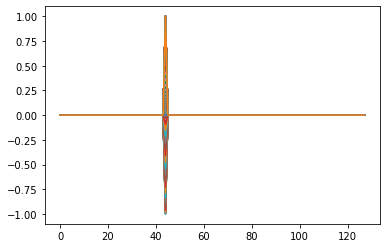

In [11]:
# positional encoding (PE) embedding function
import numpy as np
import matplotlib.pyplot as plt

seq_len = 128
d_model = 512

pe = np.zeros((seq_len, d_model))

pos = 44
for i in range(int(d_model / 2)):
    pe[pos,2*i] = np.sin(pos/(pow(10000,((2*i)/d_model))))
    pe[pos,2*i+1] = np.cos(pos/(pow(10000,((2*i)/d_model))))
    
fig = plt.plot(pe)

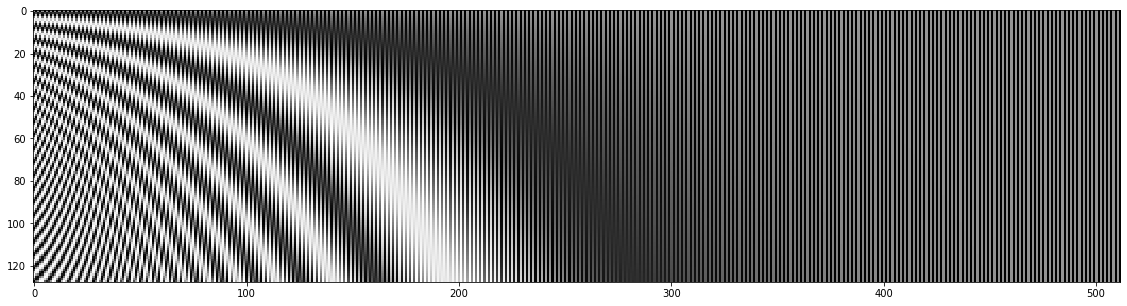

In [12]:
# positional encoding (PE) test
import numpy as np
import matplotlib.pyplot as plt

seq_len = 128
d_model = 512

pe = np.zeros((seq_len, d_model))

for pos in range(seq_len): # position in sequence
    for i in range(int(d_model / 2)): # embedding vector index
        pe[pos,2*i] = np.sin(pos/(pow(10000,((2*i)/d_model))))
        pe[pos,2*i+1] = np.cos(pos/(pow(10000,((2*i)/d_model))))
        
fig = plt.figure(figsize=(20,5))
# plt.xlabel('2i (d_model = 512)')
# plt.ylabel('pos')
plt.imshow(pe, cmap = 'Greys') 

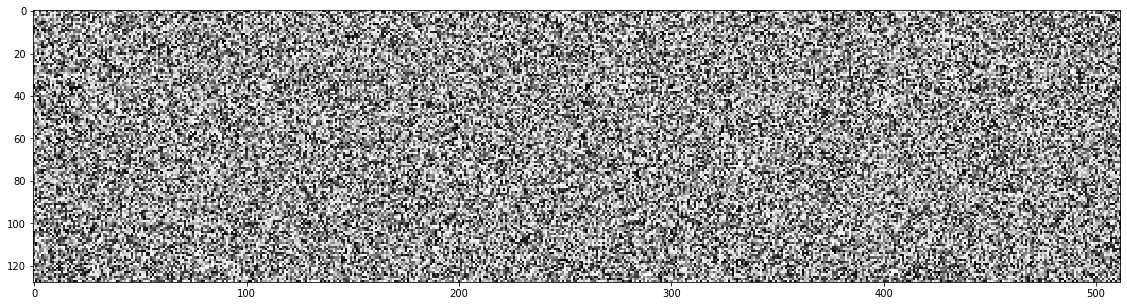

In [13]:
enc = np.zeros((seq_len, d_model))
enc = np.random.rand(seq_len, d_model)

fig= plt.figure(figsize=(20,5))
plt.imshow(enc, cmap = 'Greys')

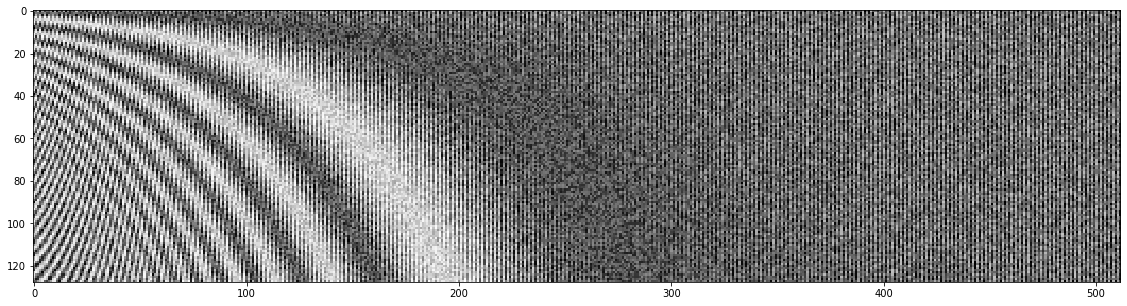

In [14]:
out = enc + pe

fig= plt.figure(figsize=(20,5))
plt.imshow(out, cmap = 'Greys')

In [26]:
# long primes

def primes2(limit):
    if limit < 2: return []
    if limit < 3: return [2]
    lmtbf = (limit - 3) // 2
    buf = [True] * (lmtbf + 1)
    for i in range((int(limit ** 0.5) - 3) // 2 + 1):
        if buf[i]:
            p = i + i + 3
            s = p * (i + 1) + i
            buf[s::p] = [False] * ((lmtbf - s) // p + 1)
    return [2] + [i + i + 3 for i, v in enumerate(buf) if v]

def cprd(p):
    '''check if period of 1/p has length p-1'''
    str1p = str(1. / float(p))
    print(str1p[2:p+1],str1p[p+1:2*p])
    if str1p[2:p+1] == str1p[p+1:2*p]:
        if str1p[2:p] == str1p[p:2*p-2]: # todo: check for possible shorter periods
            return False
        return True
    return False

def lngp(n):
    '''long primes up to n'''
    candp = primes2(n)
    res = []
    for cp in candp:
        if cprd(cp):
            res.append(cp)
    return res

def main():
    print(lngp(100))

if __name__ == '__main__':
    main()

5 
33 33
2 
142857 142857
0909090909 0909091
076923076923 07693
0588235294117647 05
05263157894736842 
043478260869565216 
034482758620689655 
03225806451612903 
02702702702702703 
024390243902439025 
023255813953488372 
02127659574468085 
018867924528301886 
01694915254237288 
01639344262295082 
014925373134328358 
014084507042253521 
0136986301369863 
012658227848101266 
012048192771084338 
011235955056179775 
010309278350515464 
[7]


In [3]:
# Humble numbers
def humbl(i,j,k,m):
    '''Humble numbers'''
    return 2**i * 3**j * 5**k * 7**m

def main():
    res = []
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for m in range(3):
                    res.append(humbl(i,j,k,m))
    res.sort()
    print(res)
    print(len(res))

if __name__ == '__main__':
    main()

[1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 14, 15, 18, 20, 21, 25, 28, 30, 35, 36, 42, 45, 49, 50, 60, 63, 70, 75, 84, 90, 98, 100, 105, 126, 140, 147, 150, 175, 180, 196, 210, 225, 245, 252, 294, 300, 315, 350, 420, 441, 450, 490, 525, 588, 630, 700, 735, 882, 900, 980, 1050, 1225, 1260, 1470, 1575, 1764, 2100, 2205, 2450, 2940, 3150, 3675, 4410, 4900, 6300, 7350, 8820, 11025, 14700, 22050, 44100]
81


In [6]:
# half-square
def sq(n):
    '''print half a square with #'''
    for i in range(n,0,-1):
        print('#' * i)
        
def main():
    sq(5)

if __name__ == '__main__':
    main()

#####
####
###
##
#


In [35]:
# Luhn validation
def luhn(n):
    '''Luhn validation'''
    nlst = [int(x)*2 if idx % 2 == 0 else int(x) for idx, x in enumerate(str(n))]
    nstr = ''.join([str(x) for x in nlst])
    return sum([int(x) for x in nstr]) % 10 == 0
        
def main():
    print(luhn(176248))

if __name__ == '__main__':
    main()

True


In [2]:
# pos/neg integers
def enterint(n):
    '''user input: int'''
    intlst = []
    for i in range(n):
        intlst.append(int(input('enter ' + str(i) + 'th integer:')))
    return intlst
        
def main():
    il = enterint(10)
    pn = input('do you want to see the count of (p)ositive or (n)egative numbers?')
    if pn == 'p':
        print(sum([1 if x > 0 else 0 for x in il]))
    else:
        print(sum([1 if x < 0 else 0 for x in il]))

if __name__ == '__main__':
    main()

enter 0th integer:1
enter 1th integer:2
enter 2th integer:3
enter 3th integer:4
enter 4th integer:5
enter 5th integer:6
enter 6th integer:-1
enter 7th integer:-2
enter 8th integer:0
enter 9th integer:0
do you want to see the count of (p)ositive or (n)egative numbers?n
2


In [16]:
import torch # root package
#from torch.utils.data import Dataset, Dataloader # dataset representation and loading

torch.randn(10) # tensor with independent N(0,1) entries
torch.zeros(10) # tensor with all 1's [or 0's]
x = torch.Tensor(5) # create tensor from [nested] list or ndarray L
x.clone() # clone of x
with torch.no_grad(): # code wrap that stops autograd from tracking tensor history
    requires_grad=True # arg, when set to True, tracks computation
# history for future derivative calculations

torch.cuda.is_available # check for cuda
x.cuda() # move x's data from
# CPU to GPU and return new object
x.cpu() # move x's data from GPU to CPU
# and return new object
if torch.cuda.is_available(): # device agnostic code
    device = torch.device('cuda') # and modularity
else: #
    device = torch.device('cpu') #
#net.to(device) # recursively convert their
# parameters and buffers to
# device specific tensors
x.to(device) # copy your tensors

tensor([-14560227667281360977920.0000,                        0.0000,
                               0.0000,                        0.0000,
                               0.0000], device='cuda:0')

In [17]:
import numpy as np
from scipy import stats

a = np.array([[1, 3, 4, 2, 2, 7],
              [5, 2, 2, 1, 4, 1],
              [3, 3, 2, 2, 1, 1]])

m = stats.mode(a)
print(m)

ModeResult(mode=array([[1, 3, 2, 2, 1, 1]]), count=array([[1, 2, 2, 2, 1, 2]]))


In [2]:
# is sorted?
def issorted(lst):
    '''is the list sorted?'''
    for i in range(1,len(lst)-1):
        if lst[i-1] < lst[i] and lst[i] > lst[i+1]:
            return False
    return True

def main():
    print(issorted([6,5,4,3,2,1]))

if __name__ == '__main__':
    main()

True


In [3]:
# text entropy 3
import math
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

def entrpc(s):
    '''calculate information entropy of given text based on characters'''
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1})
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

def entrpw(s):
    '''calculate information entropy of given text based on words'''
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1}) TODO: counter of words
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

def enteq(p):
    '''calculate info entropy of distribution p'''
    return -sum( [pi * math.log(pi, 2) for pi in p] )
        
def main():
    piece = input("Enter text: ").replace('\n', ' ').replace('\r', ' ')
    print('++++++++++++++++++++++++++++++++++++++')
    print(entrpc(piece))
    #print(enteq(1), enteq(2), enteq(3), enteq(4), enteq(5), enteq(6))
    #xc = range(1,20)
    #yc = [enteq(y) for y in range(1,20)]
    #plt.plot(xc, yc, marker='o')
    #plt.show()
    #distr = [.01, .01, .01, 1.1, .01, .01]
    #print(enteq(distr/np.sum(distr)))

if __name__=='__main__':
    main()

Enter text: 1 1 1 5
++++++++++++++++++++++++++++++++++++++
1.4488156357251847


In [4]:
# word pair encoding
import os
from gensim.parsing.preprocessing import preprocess_string
from gensim import corpora

def read1k():
    return f.read(1024)

def read_in_chunks(infile, chunk_size=1024*64):
    chunk = infile.read(chunk_size)
    while chunk:
        yield chunk
        chunk = infile.read(chunk_size)

def process_data(chunk, text):
    text.append(str(chunk)) # 'utf8' codec can't decode byte 0xc3

def rmsword(corpus, stopwords):
    '''remove stopwords from corpus'''
    return [word for word in corpus if word not in stopwords]

def chunks(l, n):
    '''Yield successive n-sized chunks from list l'''
    for i in range(0, len(l), n):
        yield l[i:i + n] # returns a generator

def chunksep(l, s):
    '''Yield successive chunks from list l separated by s'''
    g = []
    for el in l:
        if el == s:
            yield g
            g = []
        g.append(el)
    yield g
    
def ctprs(txt, ex_sp=False) -> dict:
    '''count symbol pair frequencies'''
    pairs = defaultdict(int)
    for i in range(len(txt) - 1):
        if ex_sp:
            if txt[i] == ' ' or txt[i+1] == ' ':
                continue
        pairs[txt[i], txt[i+1]] += 1
    return pairs

def ctwp(corpus, wds=1):
    '''count word pairs for corpus (tokenized) at distance wds'''
    res = {}
    for i in range(wds, len(corpus)-wds):
        if corpus[i-wds] == corpus[i] or corpus[i+wds] == corpus[i]:
            try:
                res[corpus[i]] += 1
            except KeyError:
                res[corpus[i]] = 1
    return res

def main():
    os.chdir(r'D:\BernieData\DeepL\lrgtxt0')
    f = open('Proktols of Neptune.txt', encoding="utf-8")
    text = []
    for piece in read_in_chunks(f):
        process_data(piece, text)
    corpus = preprocess_string(' '.join(text))
    dct = corpora.Dictionary([corpus])  # initialize a Dictionary
    # tokenize text
    corptzd = [dct.token2id[x] for x in corpus] # tokenized corpus
    print(ctwp(corptzd, 5))
    #print(dct[588], dct[588])
    
if __name__=='__main__':
    main()

{692: 6, 1403: 2, 1030: 4, 815: 4, 775: 2, 1044: 2, 1035: 2, 318: 2, 861: 2, 699: 2, 1399: 2, 128: 7, 902: 2, 449: 2, 1288: 4, 835: 2, 372: 2, 493: 2, 1117: 2, 900: 2, 454: 2, 905: 2, 1300: 2, 1096: 2}


In [29]:
# text entropy 4
import math
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.preprocessing import normalize

def entrpc(s):
    '''calculate information entropy of given text based on characters'''
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1})
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

def entrpw(s):
    '''calculate information entropy of given text based on words'''
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1}) TODO: counter of words
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

def entdt(p):
    '''calculate info entropy of distribution p'''
    return -sum( [pi * math.log(pi, 2) for pi in p] )

def entdpos(p, ws=1):
    '''calculate info entropy of distribution p with positional encoding'''
    m = len(p) + 1
    #p *= np.array([x*x for x in range(1, m)]) # quadratic encoding
    #return entdt(p) / (m*(m+1)*(2*m+1)) * 6 # normalize sum of quadratic series
    #p *= np.array([x for x in range(1, m)]) # linear encoding
    #return entdt(p) / (m*(m+1)) * 2 # normalize sum of series
    #p *= np.array([1./x for x in range(1, m)]) # inverse position encoding
    #return entdt(p) / sum([1./x for x in range(1, m)]) # normalize xxxxx
    #p *= np.array([math.log(x+1.) for x in range(1, m)]) # inverse position encoding
    #return entdt(p) / sum([math.log(x+1.) for x in range(1, m)]) # normalize xxxxx
    #p = np.array([(p[i-1]+p[i]+p[i+1])/3 for i in range(1,m-2)])
    p = np.array([sum(p[i-ws:i+ws])/(2*ws+1) for i in range(ws,m-ws-1)]) # todo: optimize
    # the problem with this is that it is very local, might work if non-info bearing tokens have been preprocessed out
    return entdt(p) # normalize todo!
        
def main():
    #piece = input("Enter text: ").replace('\n', ' ').replace('\r', ' ')
    print('++++++++++++++++++++++++++++++++++++++')
    #print(entrpc(piece))
    #print(entdt(1), entdt(2), entdt(3), entdt(4), entdt(5), entdt(6))
    #xc = range(1,20)
    #yc = [entdt(y) for y in range(1,20)]
    #plt.plot(xc, yc, marker='o')
    #plt.show()
    #distr = [.01, .01, .01, 1.1, .01, .01]
    #print(entdt(distr/np.sum(distr)))
    v0 = np.array([1, 5, 1, 5, 1, 5, 1, 5])
    v1 = np.array([1, 1, 1, 1, 5, 5, 5, 5])
    np.linalg.norm(v0)
    np.linalg.norm(v1)
    vpos = np.array([1., 2., 3., 4., 5., 6., 7., 8.])
    print(v0 * vpos)
    print(v1 * vpos)
    print(entdt(v0 * vpos))
    print(entdt(v1 * vpos))
    
    v0 = np.array([1., 1., 1., 1., 1., 1., 1., 1.])
    print(entdt(v0), entdpos(v0))
    v0 = np.array([1., 5., 5., 1., 1., 1., 1., 1.])
    print(entdt(v0), entdpos(v0))
    v0 = np.array([1., 1., 1., 1., 1., 5., 5., 1.])
    print(entdt(v0), entdpos(v0))
    v0 = np.array([1., 1., 1., 5., 5., 1., 1., 1.])
    print(entdt(v0), entdpos(v0))
    v0 = np.array([1., 5., 1., 1., 1., 1., 5., 1.])
    print(entdt(v0), entdpos(v0))
    v0 = np.array([1., 5., 1., 1., 5., 1., 5., 1.])
    print(entdt(v0), entdpos(v0,2))
    v0 = np.array([1., 1., 1., 5., 5., 5., 1., 1.])
    print(entdt(v0), entdpos(v0,2))

if __name__=='__main__':
    main()

++++++++++++++++++++++++++++++++++++++
[ 1. 10.  3. 20.  5. 30.  7. 40.]
[ 1.  2.  3.  4. 25. 30. 35. 40.]
-515.7576969413744
-670.4600395033555
-0.0 2.3398500028846247
-23.21928094887362 -8.619960312445041
-23.21928094887362 -6.2299853119642705
-23.21928094887362 -8.619960312445041
-23.21928094887362 -4.830074998557688
-34.82892142331043 -8.232395244362651
-34.82892142331043 -14.855857814902208


In [30]:
# text entropy 5
import math
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.preprocessing import normalize

def entrpc(s):
    '''calculate information entropy of given text based on characters'''
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1})
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

def entrpw(s):
    '''calculate information entropy of given text based on words'''
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1}) TODO: counter of words
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

def entdt(p):
    '''calculate info entropy of distribution p'''
    return -sum( [pi * math.log(pi, 2) for pi in p] )

def entdpos(p, ws=1):
    '''calculate info entropy of distribution p with positional encoding'''
    m = len(p) + 1
    dws = 2*ws+1
    p = np.array([sum(p[i-ws:i+ws])/dws for i in range(ws,m-ws-1)]) # add weights?
    # the problem with this is that it is very local, might work if non-info bearing tokens have been preprocessed out
    return entdt(p) / sum(p)
        
def main():
    #piece = input("Enter text: ").replace('\n', ' ').replace('\r', ' ')
    print('++++++++++++++++++++++++++++++++++++++')
    #print(entrpc(piece))
    #print(entdt(1), entdt(2), entdt(3), entdt(4), entdt(5), entdt(6))
    #xc = range(1,20)
    #yc = [entdt(y) for y in range(1,20)]
    #plt.plot(xc, yc, marker='o')
    #plt.show()
    #distr = [.01, .01, .01, 1.1, .01, .01]
    #print(entdt(distr/np.sum(distr)))
    v0 = np.array([1, 5, 1, 5, 1, 5, 1, 5])
    v1 = np.array([1, 1, 1, 1, 5, 5, 5, 5])
    np.linalg.norm(v0)
    np.linalg.norm(v1)
    vpos = np.array([1., 2., 3., 4., 5., 6., 7., 8.])
    print(v0 * vpos)
    print(v1 * vpos)
    print(entdt(v0 * vpos))
    print(entdt(v1 * vpos))
    
    v0 = np.array([1., 1., 1., 1., 1., 1., 1., 1.])
    print(entdt(v0), entdpos(v0))
    v0 = np.array([1., 5., 5., 1., 1., 1., 1., 1.])
    print(entdt(v0), entdpos(v0))
    v0 = np.array([1., 1., 1., 1., 1., 5., 5., 1.])
    print(entdt(v0), entdpos(v0))
    v0 = np.array([1., 1., 1., 5., 5., 1., 1., 1.])
    print(entdt(v0), entdpos(v0))
    v0 = np.array([1., 5., 1., 1., 1., 1., 5., 1.])
    print(entdt(v0), entdpos(v0))
    v0 = np.array([1., 5., 1., 1., 5., 1., 5., 1.])
    print(entdt(v0), entdpos(v0,2))
    v0 = np.array([1., 1., 1., 5., 5., 5., 1., 1.])
    print(entdt(v0), entdpos(v0,2))

if __name__=='__main__':
    main()

++++++++++++++++++++++++++++++++++++++
[ 1. 10.  3. 20.  5. 30.  7. 40.]
[ 1.  2.  3.  4. 25. 30. 35. 40.]
-515.7576969413744
-670.4600395033555
-0.0 0.5849625007211563
-23.21928094887362 -0.9235671763333974
-23.21928094887362 -0.7787481639955338
-23.21928094887362 -0.9235671763333974
-23.21928094887362 -0.603759374819711
-34.82892142331043 -1.0290494055453314
-34.82892142331043 -1.42844786681752


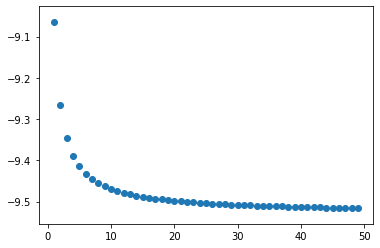

In [37]:
# word pair encoding and text entropy
import os
from gensim.parsing.preprocessing import preprocess_string
from gensim import corpora
import math
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

def read1k():
    return f.read(1024)

def read_in_chunks(infile, chunk_size=1024*64):
    chunk = infile.read(chunk_size)
    while chunk:
        yield chunk
        chunk = infile.read(chunk_size)

def process_data(chunk, text):
    text.append(str(chunk)) # 'utf8' codec can't decode byte 0xc3

def rmsword(corpus, stopwords):
    '''remove stopwords from corpus'''
    return [word for word in corpus if word not in stopwords]

def chunks(l, n):
    '''Yield successive n-sized chunks from list l'''
    for i in range(0, len(l), n):
        yield l[i:i + n] # returns a generator

def chunksep(l, s):
    '''Yield successive chunks from list l separated by s'''
    g = []
    for el in l:
        if el == s:
            yield g
            g = []
        g.append(el)
    yield g
    
def ctprs(txt, ex_sp=False) -> dict:
    '''count symbol pair frequencies'''
    pairs = defaultdict(int)
    for i in range(len(txt) - 1):
        if ex_sp:
            if txt[i] == ' ' or txt[i+1] == ' ':
                continue
        pairs[txt[i], txt[i+1]] += 1
    return pairs

def ctwp(corpus, wds=1):
    '''count word pairs for corpus (tokenized) at distance wds'''
    res = {}
    for i in range(wds, len(corpus)-wds):
        if corpus[i-wds] == corpus[i] or corpus[i+wds] == corpus[i]:
            try:
                res[corpus[i]] += 1
            except KeyError:
                res[corpus[i]] = 1
    return res

def entrpc(s):
    '''calculate information entropy of given text based on characters'''
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1})
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

def entrpw(s):
    '''calculate information entropy of given text based on words'''
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1}) TODO: counter of words
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

def entdt(p):
    '''calculate info entropy of distribution p'''
    return -sum( [pi * math.log(pi, 2) for pi in p] )

def entdpos(p, ws=1):
    '''calculate info entropy of distribution p with positional encoding'''
    m = len(p) + 1
    dws = 2*ws+1
    p = np.array([sum(p[i-ws:i+ws])/dws for i in range(ws,m-ws-1)]) # add weights?
    # the problem with this is that it is very local, might work if non-info bearing tokens have been preprocessed out
    return entdt(p) / sum(p)

def main():
    os.chdir(r'D:\BernieData\DeepL\lrgtxt0')
    f = open('Proktols of Neptune.txt', encoding="utf-8")
    text = []
    for piece in read_in_chunks(f):
        process_data(piece, text)
    corpus = preprocess_string(' '.join(text))
    dct = corpora.Dictionary([corpus])  # initialize a Dictionary
    # tokenize text
    corptzd = [dct.token2id[x] for x in corpus] # tokenized corpus
    #print(ctwp(corptzd, 5))
    #print(dct[588], dct[588])
    #print(entdpos(corptzd,4))
    #print(entdpos(corptzd,2))
    xp = list(range(1,50))
    yp = [entdpos(corptzd,x) for x in xp]
    plt.scatter(xp, yp)
    plt.show()
    
if __name__=='__main__':
    main()